In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option("display.max_columns",None)

In [2]:
datasets=pd.read_csv("student-mat.csv")

In [3]:
datasets.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
datasets.shape

(395, 33)

# finding out diferent types of features


# missing values

In [5]:
missing_features=[feature for feature in datasets.columns if np.nan in datasets[feature]]

In [6]:
missing_features

[]

In [7]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

# numerical features

In [8]:
numerical_feature=[feature for feature in datasets.columns if datasets[feature].dtypes!="O"]

In [9]:
print(len(numerical_feature),"\n",numerical_feature)

16 
 ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


# discrete features

In [10]:
discrete_features=[feature for feature in numerical_feature if len(datasets[feature].unique())<15]

In [11]:
discrete_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [12]:
for feature in discrete_features:
    data=datasets.copy()
    print(f"{feature}: {len(datasets[feature].unique())}")

age: 8
Medu: 5
Fedu: 5
traveltime: 4
studytime: 4
failures: 4
famrel: 5
freetime: 5
goout: 5
Dalc: 5
Walc: 5
health: 5


# continuos features

In [13]:
continuos_features=[feature for feature in numerical_feature if len(datasets[feature].unique())>15]

In [14]:
continuos_features

['absences', 'G1', 'G2', 'G3']

In [15]:
for feature in continuos_features:
    data=datasets.copy()
    print(f"{feature}: {len(datasets[feature].unique())}")

absences: 34
G1: 17
G2: 17
G3: 18


# categorical features

In [16]:
categorical_features=[feature for feature in datasets.columns if datasets[feature].dtypes=="O"]

In [17]:
categorical_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [18]:
for feature in categorical_features:
    data=datasets.copy()
    print(f"{feature}: {len(datasets[feature].unique())}")

school: 2
sex: 2
address: 2
famsize: 2
Pstatus: 2
Mjob: 5
Fjob: 5
reason: 4
guardian: 3
schoolsup: 2
famsup: 2
paid: 2
activities: 2
nursery: 2
higher: 2
internet: 2
romantic: 2


# visualization of features

# discrete feature vs output label

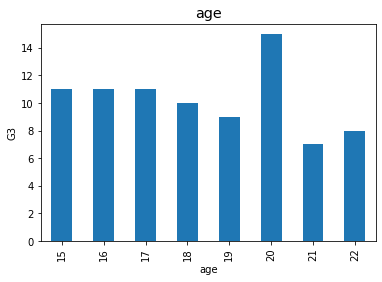

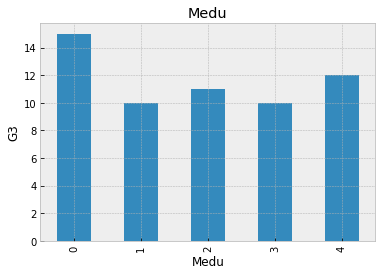

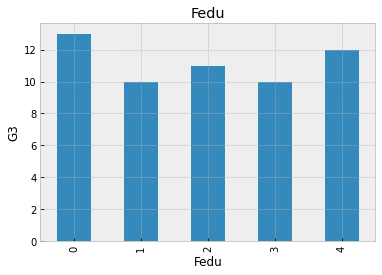

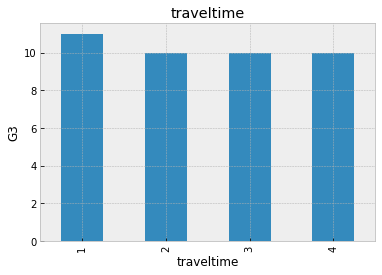

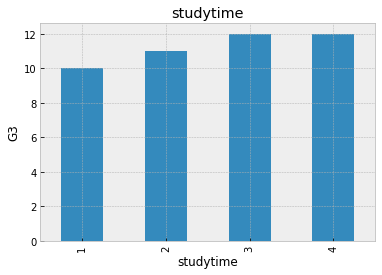

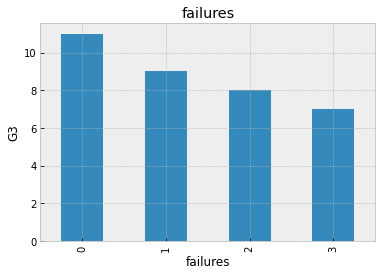

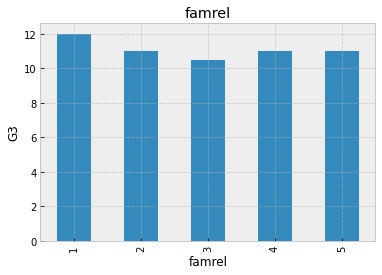

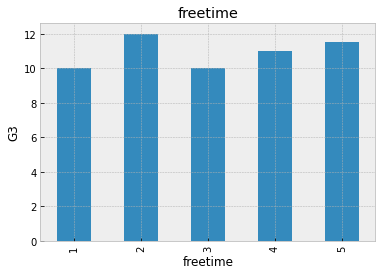

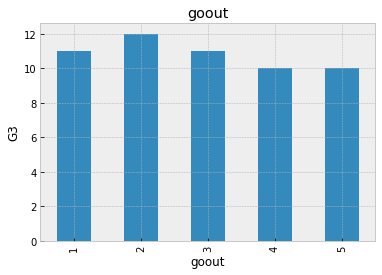

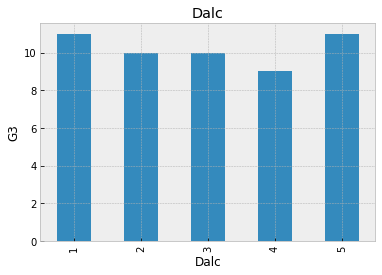

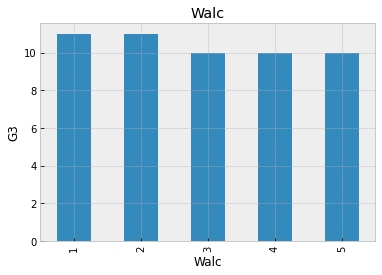

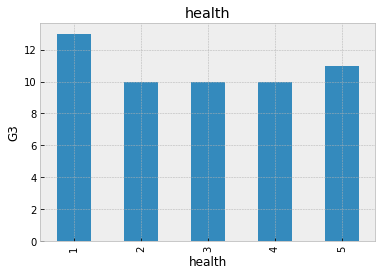

In [19]:
for feature in discrete_features:
    data=datasets.copy()
    data.groupby(feature)["G3"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("G3")
    plt.style.use("bmh")
    plt.title(feature)
    plt.show()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


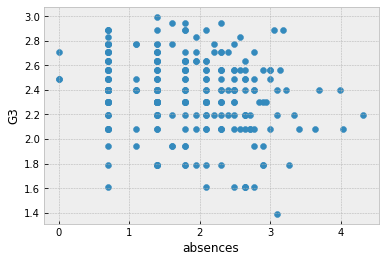

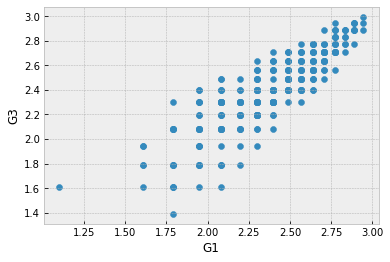

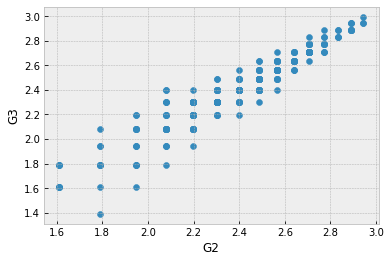

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


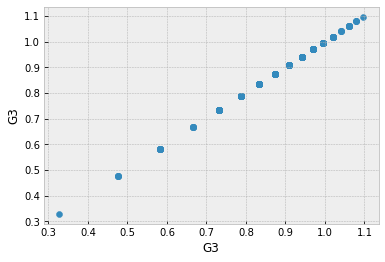

In [20]:
for feature in continuos_features:
        data=datasets.copy()
#     if 0 in data[feature].unique():
#         pass
#     else:
        data[feature]=np.log(data[feature])
        data["G3"]=np.log(data["G3"])
        plt.scatter(data[feature],data["G3"])
        plt.ylabel("G3")
        plt.xlabel(feature)
        plt.show()

# Continous features vs output label

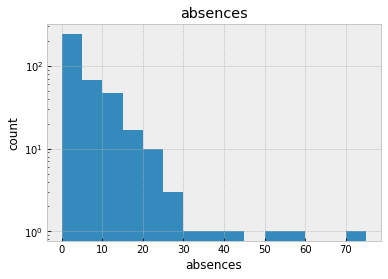

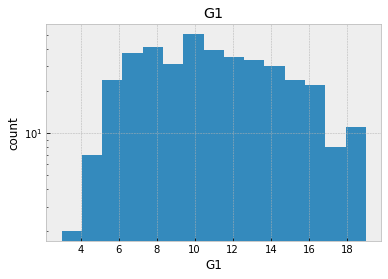

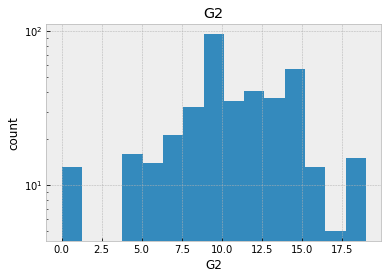

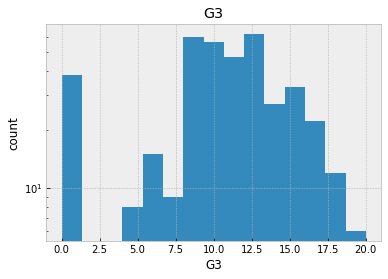

In [21]:
for feature in continuos_features:
    data=datasets.copy()
    plt.hist(data[feature],bins=15,log=True)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

# outliers 

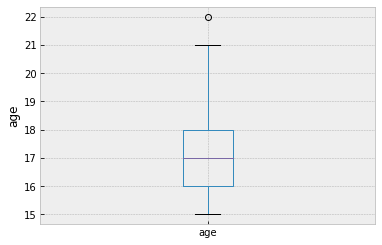

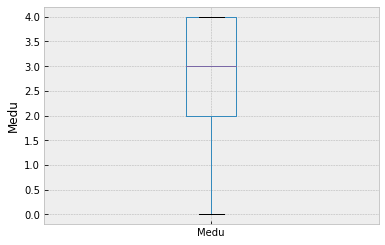

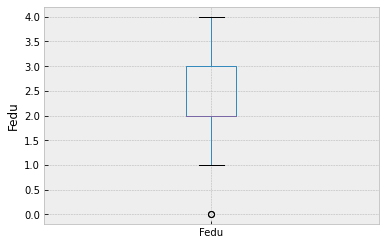

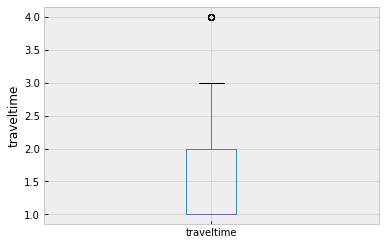

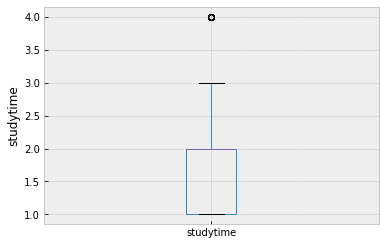

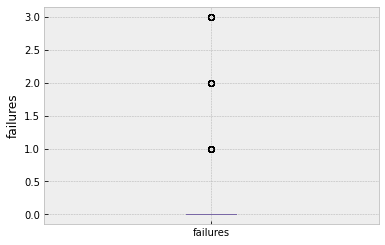

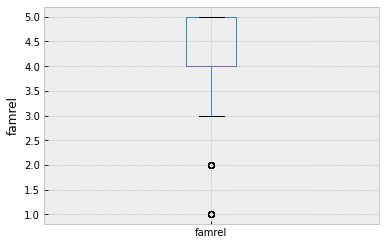

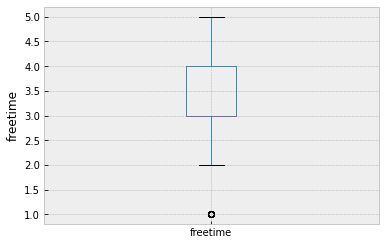

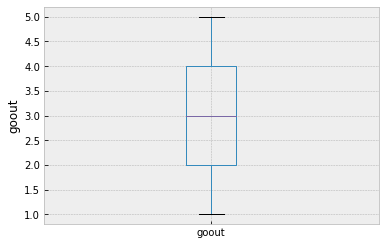

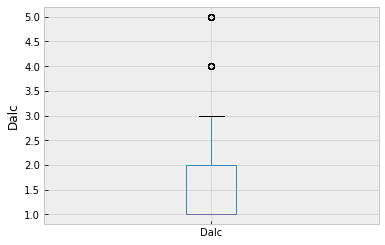

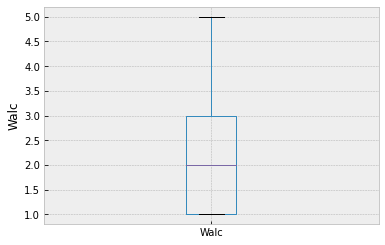

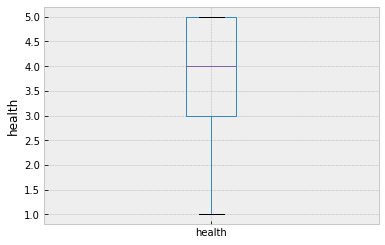

In [22]:
for feature in discrete_features:
    data=datasets.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

# categorical features vs output labels

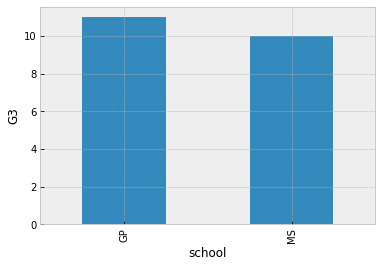

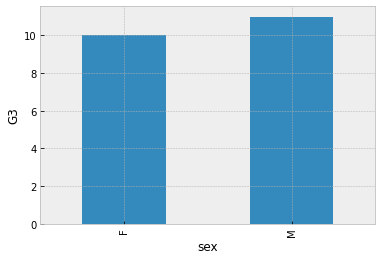

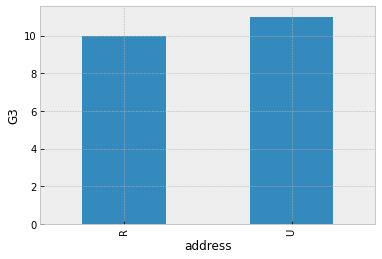

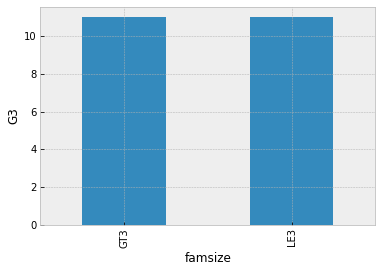

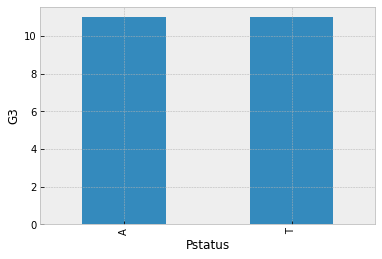

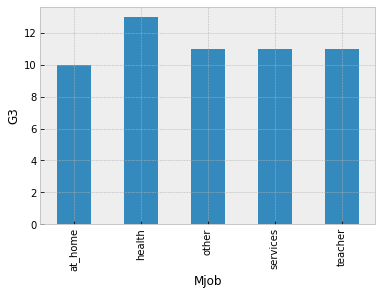

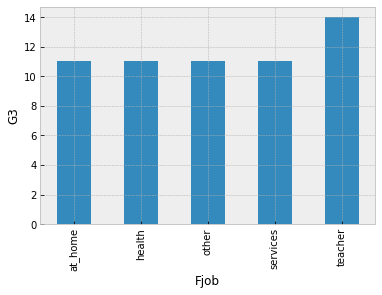

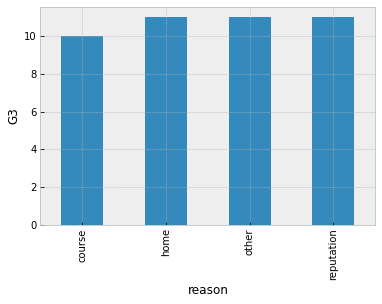

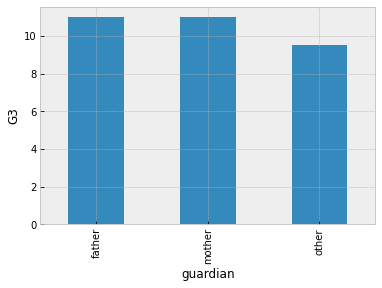

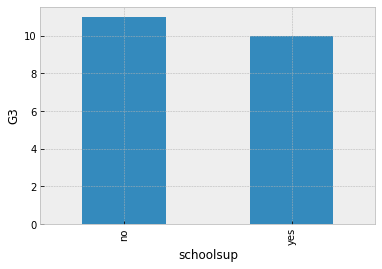

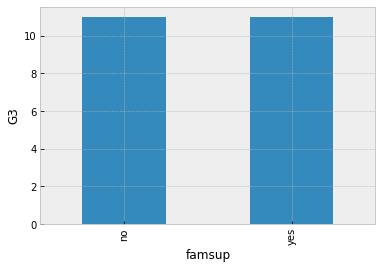

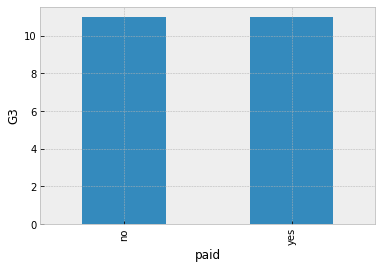

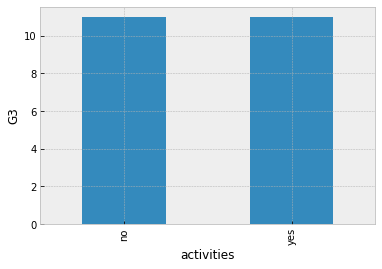

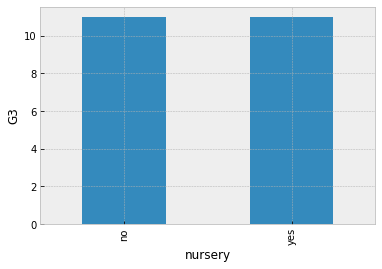

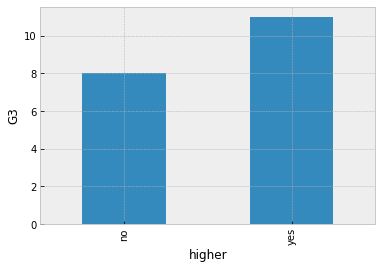

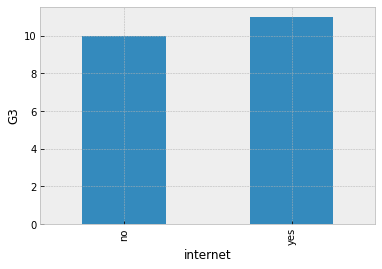

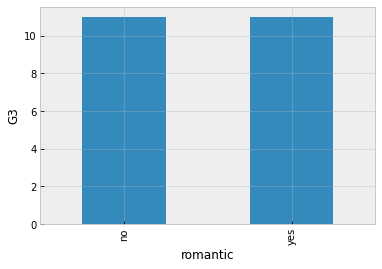

In [23]:
for feature in categorical_features:
    data=datasets.copy()
    data.groupby(feature)["G3"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("G3")
    plt.show()

# feature engineering

In [24]:
datasets.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [25]:
for i in categorical_features:
    temp=datasets.groupby(i)["G3"].count()/len(datasets)
    temp_df=temp[temp>0.01].index
    datasets[i]=np.where(datasets[i].isin(temp_df),datasets[i],"rare_var")

In [26]:
yesno_feature=[feature for feature in datasets.columns if "yes" in datasets[feature].unique()]
yesno_feature

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


['schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [27]:
for feature in yesno_feature:
    datasets[feature]=np.where(datasets[feature]=="yes",1,0)

In [28]:
datasets.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [29]:
def Conv_binary(dataset):
    two_data=[feature for feature in dataset.columns if len(dataset[feature].unique())<3 and dataset[feature].dtypes=="O"]
    for i in two_data:
        dataset.replace(dataset[i].unique()[0],0,inplace=True)
        dataset.replace(dataset[i].unique()[1],1,inplace=True)
    return dataset
        

In [30]:
Conv_binary(datasets)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,services,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,1,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,0,1,1,1,other,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,1,1,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


In [31]:
datasets

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,services,services,course,other,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,1,1,3,1,services,services,course,mother,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,0,1,1,1,other,other,course,other,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,1,1,3,2,services,other,course,mother,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


In [32]:
datasets["guardian_code"]=pd.factorize(datasets.guardian)[0]
datasets.drop("guardian",axis=1,inplace=True)

In [33]:
datasets

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_code
0,0,0,18,0,0,0,4,4,at_home,teacher,course,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0
1,0,0,17,0,0,1,1,1,at_home,other,course,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,0,0,15,0,1,1,1,1,at_home,other,other,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0
3,0,0,15,0,0,1,4,2,health,services,home,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0
4,0,0,16,0,0,1,3,3,other,other,home,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,services,services,course,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,2
391,1,1,17,0,1,1,3,1,services,services,course,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0
392,1,1,21,1,0,1,1,1,other,other,course,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,2
393,1,1,18,1,1,1,3,2,services,other,course,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,0


In [34]:
datasets["reason_code"]=pd.factorize(datasets.reason)[0]
datasets.drop("reason",axis=1,inplace=True)

In [35]:
datasets["Mjob_code"]=pd.factorize(datasets.Mjob)[0]
datasets.drop("Mjob",axis=1,inplace=True)

In [36]:
datasets["Fjob_code"]=pd.factorize(datasets.Fjob)[0]
datasets.drop("Fjob",axis=1,inplace=True)

we can use label encode from sklearn to convert categorical data into numerical data

In [37]:
# from sklearn.preprocessing import LabelEncoder
# ln=LabelEncoder()
# datasets["reason_code"]=ln.fit_transform(datasets.reason)
# #the above function is recommended in order to convert categorical variable into numerical variable

# feature selection

In [38]:
X_data=datasets.drop("G3",axis=1)
y_data=datasets["G3"]

In [39]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
X_data=mn.fit_transform(X_data)

feature selection can be done with the help of sklearn tools in ordr to select only relevent features from the available features

# splitting the data into train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=43)

In [41]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("X_test",len(X_test))

X_train 316
X_test 79
Y_train 316
X_test 79


# model selection

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model1=LinearRegression()
model1.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=10,shuffle=False)
score1=cross_val_score(model1,X_train,Y_train,cv=kfold,scoring="neg_mean_squared_error")
print("MSE:",(-score1).mean())

MSE: 4.576049870379767


In [44]:
score1.std()

1.4309734139750825

In [45]:
rmse1=np.sqrt((-score1).mean())

In [46]:
rmse1

2.1391703696479545

In [47]:
x_sample=X_train[10:20]
y_sample=Y_train[10:20]

In [48]:
y_predict=model1.predict(x_sample)

In [49]:
print(y_predict,list(y_sample))

[12.79501934 10.97316553 17.69668546 12.32174881 11.65201746  7.0412664
  7.78948104 10.06653991  8.13197467  4.90571585] [14, 11, 18, 13, 11, 10, 6, 11, 10, 5]


In [50]:
Y_actual_predictions=model1.predict(X_test)

In [51]:
from sklearn.metrics import r2_score

In [52]:
R2=r2_score(Y_test,Y_actual_predictions)

In [53]:
R2

0.8253976878310678

# conclusion

this linear regression model successfully predicted the ouput variable (G3) with a r2 score of around >80% 